# HWP_Carbon

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

# src_dir = os.path.abspath('..')
# if src_dir not in os.sys.path:
#     os.sys.path.insert(1, src_dir)
# print(src_dir)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from hwp_carbon.network import CarbonNetwork
from hwp_carbon.network_plotting import network_to_dot
from hwp_carbon.utils import excel_to_carbonnetwork_init_data, adjust_array

In [4]:
array = np.array([np.nan, 1, 2, np.nan, 4.5, 6, np.nan, np.nan, -6, np.nan])
adjust_array(array, wanted_length=3)

array([1., 1., 2.])

## Simulation

In [5]:
excel_path = '../tests/test_data.xlsx'

In [6]:
init_data = excel_to_carbonnetwork_init_data(excel_path)

In [11]:
net = CarbonNetwork(init_data)
net1 = CarbonNetwork(init_data)

In [10]:
dot = network_to_dot(net)

dot.graph_attr['nodesep'] = '1'
dot.graph_attr['ranksep'] = '1'
dot.graph_attr['splines'] = 'spline' # 'ortho'
dot.render('test_data')

'test_data.png'

In [19]:
inputs = {'paper': [300, 0, 0, 100], 'veneer': [75], 'sawnwood':[200]}
steps = 100
net.run_simulation(inputs, steps=steps)

In [ ]:
df = net.get_flows_attr('values', as_dataframe=True)
df.index.levels[1]

In [ ]:
(df[df.index.get_level_values('dst_pool') == 'bioenergy'].sum()* net.pools['bioenergy'].substitution_factor).sum()

In [28]:
net.get_pools_attr('carbon_stock', as_dataframe=True).loc['bioenergy'].sum()

0.0

In [18]:
net.get_pools_attr('substitution', as_dataframe=True)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
pool_name,,,,,,,,,,,,,,,,,,,,,
sawnwood,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
veneer,33.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
paper,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
bioenergy,8.351824,6.049491,4.418299,3.261749,2.440893,1.857478,1.442027,1.145411,0.932888,0.779892,...,0.073776,0.072213,0.070683,0.069187,0.067723,0.066291,0.06489,0.063519,0.062177,0.060865
landfill_degradable,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
landfill_non_degradable,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
co2_emissions,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
ch4_emissions,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


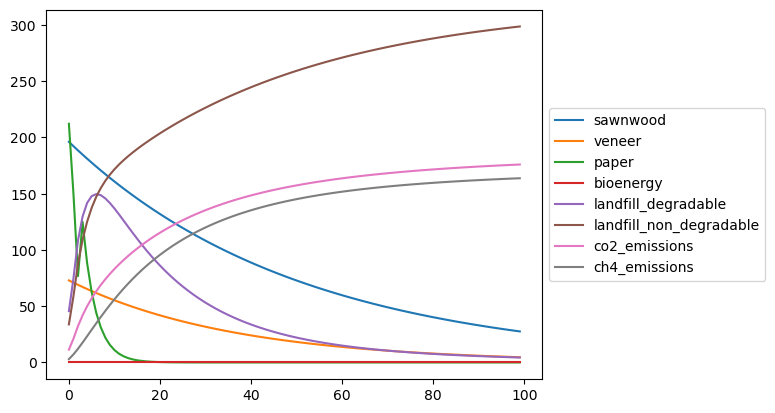

In [38]:
fig = net.get_pools_attr('carbon_stock', as_dataframe=True).T.plot()
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.get_figure().savefig('test_results_carbon_stocks.png', bbox_inches='tight')

In [ ]:
net.get_pools_attr('substitution', as_dataframe=True).T.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [27]:
net.get_flows_attr('values', as_dataframe=True)[[0,1,2]].round(4).to_dict()

{0: {('sawnwood', 'bioenergy'): 0.3922,
  ('sawnwood', 'landfill_degradable'): 0.902,
  ('sawnwood', 'landfill_non_degradable'): 2.6277,
  ('paper', 'bioenergy'): 8.7868,
  ('paper', 'landfill_degradable'): 49.2061,
  ('paper', 'landfill_non_degradable'): 29.8751,
  ('veneer', 'bioenergy'): 0.2051,
  ('veneer', 'landfill_degradable'): 0.4717,
  ('veneer', 'landfill_non_degradable'): 1.3741,
  ('bioenergy', 'co2_emissions'): 9.3841,
  ('landfill_degradable', 'co2_emissions'): 2.0146,
  ('landfill_degradable', 'ch4_emissions'): 2.9538},
 1: {('sawnwood', 'bioenergy'): 0.3845,
  ('sawnwood', 'landfill_degradable'): 0.8843,
  ('sawnwood', 'landfill_non_degradable'): 2.5761,
  ('paper', 'bioenergy'): 6.2132,
  ('paper', 'landfill_degradable'): 34.7939,
  ('paper', 'landfill_non_degradable'): 21.1249,
  ('veneer', 'bioenergy'): 0.1995,
  ('veneer', 'landfill_degradable'): 0.4588,
  ('veneer', 'landfill_non_degradable'): 1.3365,
  ('bioenergy', 'co2_emissions'): 6.7972,
  ('landfill_degradabl

### Speed test

In [ ]:
import timeit

In [ ]:
import timeit
timeit.template = """
def inner(_it, _timer{init}):
    {setup}
    _t0 = _timer()
    for _i in _it:
        retval = {stmt}
    _t1 = _timer()
    return _t1 - _t0, retval
"""

In [ ]:
Globals = 

In [ ]:
# Speed test
inputs = {'paper': [100], 'veneer': [200], 'sawnwood':[250]}
exc_time = {} 
myGlobals= globals()
myGlobals.update({'net': net})
for steps in range(10, 500, 50):
    print(f'steps : {steps}')
    t = timeit.Timer('net.run_simulation(inputs, steps=steps)', globals=myGlobals).timeit(number=1000)
    exc_time[steps] = t[0]/1000

In [ ]:
exc_time

In [11]:
%%timeit
inputs = {'paper': [100], 'veneer': [200], 'sawnwood':[250]}
net.run_simulation(inputs, steps=500)

9.45 ms ± 912 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Plotting

In [ ]:
dot = network_to_dot(net)

In [ ]:
dot

# Decay func testing

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numba import vectorize, float64

In [ ]:
half_life = 4
steps = 100
inputs = [100] * steps

## with numba an accumulate

In [ ]:
def _construct_decay_func(half_life):
    '''use f.accumulate(data) to calculate the remaining product with a decay_rate'''
    if half_life == 0:
        decay_rate = 0
    elif np.isnan(half_life):
        decay_rate = 1
    else:
        decay_rate = math.exp(-math.log(2)/half_life)
    @vectorize([float64(float64, float64)])
    def f(x, y):
        return decay_rate * (x + y)
    return f

In [ ]:
%timeit func = _construct_decay_func(half_life)
%timeit -n 250 -r 7 t = func.accumulate(inputs)

## python and numpy

In [ ]:
def _construct_decay_func(half_life):
    '''use f.accumulate(data) to calculate the remaining product with a decay_rate'''
    if half_life == 0:
        decay_rate = 0
    elif np.isnan(half_life):
        decay_rate = 1
    else:
        decay_rate = math.exp(-math.log(2)/half_life)
    def f(x, y):
        return decay_rate * (x + y)
    return np.frompyfunc(f, nin=2, nout=1)

In [ ]:
%timeit func = _construct_decay_func(half_life)
%timeit -n 250 -r 7 t = func.accumulate(inputs)

In [ ]:
start = 100
steps = 100
half_life = 
math.exp(-math.log(2)/half_life)

In [ ]:
%time t = [start*0**t for t in range(steps)]

# Loop in graph

In [ ]:
def cyclic(graph):
    """Return True if the directed graph has a cycle.
    The graph must be represented as a dictionary mapping vertices to
    iterables of neighbouring vertices. For example:

    >>> cyclic({1: (2,), 2: (3,), 3: (1,)})
    True
    >>> cyclic({1: (2,), 2: (3,), 3: (4,)})
    False
    
    https://codereview.stackexchange.com/questions/86021/check-if-a-directed-graph-contains-a-cycle
    """
    visited = set()
    path = [object()]
    path_set = set(path)
    stack = [iter(graph)]
    while stack:
        print(f'{stack=}')
        for v in stack[-1]:
            print(f' {v=}')
            if v in path_set:
                return True, f'Loop found on node {v}'
            elif v not in visited:
                visited.add(v)
                path.append(v)
                path_set.add(v)
                stack.append(iter(graph.get(v, ())))
                break
        else:
            path_set.remove(path.pop())
            stack.pop()
    return False, 'No loop found'

In [ ]:
net.arcs

In [ ]:
graph = {pool_name: [child_name for child_name in pool.dst_pools if not net.flows[pool_name, child_name].recycling] for pool_name, pool in net.pools.items()}
cyclic(graph)

In [ ]:
def search(d, key, default=None):
    """Return a value corresponding to the specified key in the (possibly
    nested) dictionary d. If there is no item with that key, return
    default.
 
    """
    stack = [iter(d.items())]
    while stack:
        for k, v in stack[-1]:
            print(f'{k=}, {v=}')
            if isinstance(v, dict):
                stack.append(iter(v.items()))
                break
            elif k == key:
                return v
        else:
            print('poping')
            stack.pop()
    return default

In [ ]:
d = {1:{2:{3:{4:{}}}}}
search(d, 'test')

In [ ]:
[pool_name for pool_name, pool in net.pools.items() 
 if not pool.src_pools 
    or all([net.flows[(parent_name, pool_name)].recycling 
            for parent_name in pool.src_pools])]

# Graphviz test

In [ ]:
import graphviz  # doctest: +NO_EXE
dot = graphviz.Digraph(comment='The Round Table')
dot  #doctest: +ELLIPSIS

In [ ]:
dot.node('A', 'King Arthur')  # doctest: +NO_EXE
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

In [ ]:
print(dot.source)

In [ ]:
graphviz.Graph